

# Project:  Tmdb movie

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 **source from kaggle** 
 **dataset columns**:
* id - A unique identifier for each movie.
* popularity - A numeric quantity specifying the movie popularity.
* budget - The budget in which the movie was made.
* revenue - The worldwide revenue generated by the movie.
* original_title - The title of the movie before translation or adaptation.
* cast - The name of lead and supporting actors.
* homepage - A link to the homepage of the movie.
* director - Movie Director
* tagline - Movie's tagline.
* overview - A brief description of the movie.
* runtime - The running time of the movie in minutes.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* production_companies - The production house of the movie.
* release_date - The date on which it was released.
* vote_count - the count of votes recieved.
* vote_average - average ratings the movie recieved.
* release_year - Movie release year
* budget_adj- show the budget of the associated movie 
* revenue_adj- show the revenue of the associated movie 

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Question(s) for Analysis
**(1) What is the relation between popularity and revenue_adj ?**

**(2) Is there a relation between budget and revenue ?**

**(3) What is the average budget for the movies?**

**(4) What is the average revenue for the movies?**

**(5) How many movies in each genre?**

**(6) What are the most ten profitable movie?**

**(7) What are the most ten movies have highest reveneu ?**

**(8) The most genres associated with the high revenue movies?**

**(9) Which movie have high popularity over all years ?**

**(10) Which genre have high popularity over all years ?**

**(11) What are the most ten directors achieve highest reveneu from the movies ?**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
<a id='wrangling'></a>
## Data Wrangling

**Here we want to** :
* Indentifying any problems in the quality or structure of the data
 

### General Properties
* (1) Assessing and build intuition 
* (2) Defining shape and data types
* (3) Display the summary of data including nan-values
* (4) take observation about what to need to be changed or removed then try to solve it

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [84]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [85]:
df.shape

(10866, 21)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [87]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [88]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [89]:
df[df['budget']==0]['budget'].count()

5696

In [90]:
df[df['budget_adj']==0]['budget_adj'].count()

5696

In [91]:
df[df['revenue']==0]['revenue'].count()

6016

In [92]:
df[df['revenue_adj']==0]['revenue_adj'].count()

6016

In [93]:
df[df['runtime']==0]['runtime'].count()

31

In [94]:
df_updated=df.drop(['homepage','overview','keywords', 'imdb_id', 'production_companies','cast', 'tagline',], axis=1)
df_updated=df_updated.dropna(axis=0)

In [95]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10801 non-null  int64  
 1   popularity      10801 non-null  float64
 2   budget          10801 non-null  int64  
 3   revenue         10801 non-null  int64  
 4   original_title  10801 non-null  object 
 5   director        10801 non-null  object 
 6   runtime         10801 non-null  int64  
 7   genres          10801 non-null  object 
 8   release_date    10801 non-null  object 
 9   vote_count      10801 non-null  int64  
 10  vote_average    10801 non-null  float64
 11  release_year    10801 non-null  int64  
 12  budget_adj      10801 non-null  float64
 13  revenue_adj     10801 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [96]:
df_updated.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [97]:
df.duplicated().sum()

1

In [98]:
df.shape

(10866, 21)

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
## **Observation**:
**(1) We have lots of nan-values that we want to remove in** :
* homepage 
* tagline 
* cast
* imdb_id 
* keywords
* production_companies

**(2) We have unwanted columns for analysis**:
* cast

**(3) We have lots of zero values in bundget, budget_adj, revenue and revenue_adj columns but few in runtime column**

**(4) We have 44 nan-value for genres and 23 nan-value for director, so we will remove it from data**

**(5) We have release_date column need to be transformed to datetime**

**(6) We have one duplicated row**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


## Data Cleaning



**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [99]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.drop(['homepage','overview','keywords', 'imdb_id', 'production_companies','cast', 'tagline'], axis=1, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [100]:
df.dropna(axis=0,inplace=True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10801 non-null  int64  
 1   popularity      10801 non-null  float64
 2   budget          10801 non-null  int64  
 3   revenue         10801 non-null  int64  
 4   original_title  10801 non-null  object 
 5   director        10801 non-null  object 
 6   runtime         10801 non-null  int64  
 7   genres          10801 non-null  object 
 8   release_date    10801 non-null  object 
 9   vote_count      10801 non-null  int64  
 10  vote_average    10801 non-null  float64
 11  release_year    10801 non-null  int64  
 12  budget_adj      10801 non-null  float64
 13  revenue_adj     10801 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [102]:
df.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [103]:
# drop duplicates 
df.drop_duplicates(inplace=True)

# print number of duplicates 
df.duplicated().sum()

0

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10800 non-null  int64  
 1   popularity      10800 non-null  float64
 2   budget          10800 non-null  int64  
 3   revenue         10800 non-null  int64  
 4   original_title  10800 non-null  object 
 5   director        10800 non-null  object 
 6   runtime         10800 non-null  int64  
 7   genres          10800 non-null  object 
 8   release_date    10800 non-null  object 
 9   vote_count      10800 non-null  int64  
 10  vote_average    10800 non-null  float64
 11  release_year    10800 non-null  int64  
 12  budget_adj      10800 non-null  float64
 13  revenue_adj     10800 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [105]:
#replace zero values with null values in all 3 columns to NaN.
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
df['budget_adj'] = df['budget_adj'].replace(0, np.NaN)
df['revenue_adj'] = df['revenue_adj'].replace(0, np.NaN)
df['runtime'] =df['runtime'].replace(0, np.NAN)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10800 non-null  int64  
 1   popularity      10800 non-null  float64
 2   budget          5164 non-null   float64
 3   revenue         4848 non-null   float64
 4   original_title  10800 non-null  object 
 5   director        10800 non-null  object 
 6   runtime         10772 non-null  float64
 7   genres          10800 non-null  object 
 8   release_date    10800 non-null  object 
 9   vote_count      10800 non-null  int64  
 10  vote_average    10800 non-null  float64
 11  release_year    10800 non-null  int64  
 12  budget_adj      5164 non-null   float64
 13  revenue_adj     4848 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 1.2+ MB


In [107]:
df.fillna(df.mean(), inplace=True);
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10800 non-null  int64  
 1   popularity      10800 non-null  float64
 2   budget          10800 non-null  float64
 3   revenue         10800 non-null  float64
 4   original_title  10800 non-null  object 
 5   director        10800 non-null  object 
 6   runtime         10800 non-null  float64
 7   genres          10800 non-null  object 
 8   release_date    10800 non-null  object 
 9   vote_count      10800 non-null  int64  
 10  vote_average    10800 non-null  float64
 11  release_year    10800 non-null  int64  
 12  budget_adj      10800 non-null  float64
 13  revenue_adj     10800 non-null  float64
dtypes: float64(7), int64(3), object(4)
memory usage: 1.2+ MB


In [108]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10800 non-null  int64         
 1   popularity      10800 non-null  float64       
 2   budget          10800 non-null  float64       
 3   revenue         10800 non-null  float64       
 4   original_title  10800 non-null  object        
 5   director        10800 non-null  object        
 6   runtime         10800 non-null  float64       
 7   genres          10800 non-null  object        
 8   release_date    10800 non-null  datetime64[ns]
 9   vote_count      10800 non-null  int64         
 10  vote_average    10800 non-null  float64       
 11  release_year    10800 non-null  int64         
 12  budget_adj      10800 non-null  float64       
 13  revenue_adj     10800 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(3), object(3)


In [110]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10800.000000,10800.000000,1.080000e+04,1.080000e+04,10800.000000,10800.000000,10800.000000,10800.000000,1.080000e+04,1.080000e+04
mean,65576.183426,0.649455,3.076690e+07,8.925500e+07,102.455347,218.600741,5.970880,2001.289537,3.692239e+07,1.151223e+08
std,91756.079939,1.002441,2.690649e+07,1.085948e+08,30.339746,577.165055,0.933006,12.819545,2.901836e+07,1.332341e+08
min,5.000000,0.000188,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10570.500000,0.209157,1.900000e+07,4.049083e+07,90.000000,17.000000,5.400000,1995.000000,2.432644e+07,5.784371e+07
50%,20460.000000,0.385471,3.076690e+07,8.925500e+07,99.000000,39.000000,6.000000,2006.000000,3.692239e+07,1.151223e+08
75%,74725.250000,0.717508,3.076690e+07,8.925500e+07,111.250000,147.000000,6.600000,2011.000000,3.692239e+07,1.151223e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
<a id='eda'></a>
## Exploratory Data Analysis
## **Questions**

**(1) What is the relation between popularity and revenue_adj ?**

**(2) Is there a relation between budget and revenue ?**

**(3) What is the average budget for the movies?**

**(4) What is the average revenue for the movies?**

**(5) How many movies in each genre?**

**(6) What are the most ten profitable movie?**

**(7) What are the most ten movies have highest reveneu ?**

**(8) The most genres associated with the high revenue movies?**

**(9) Which movie have high popularity over all years ?**

**(10) Which genre have high popularity over all years ?**

**(11) What are the most ten directors achieve highest reveneu from the movies ?**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

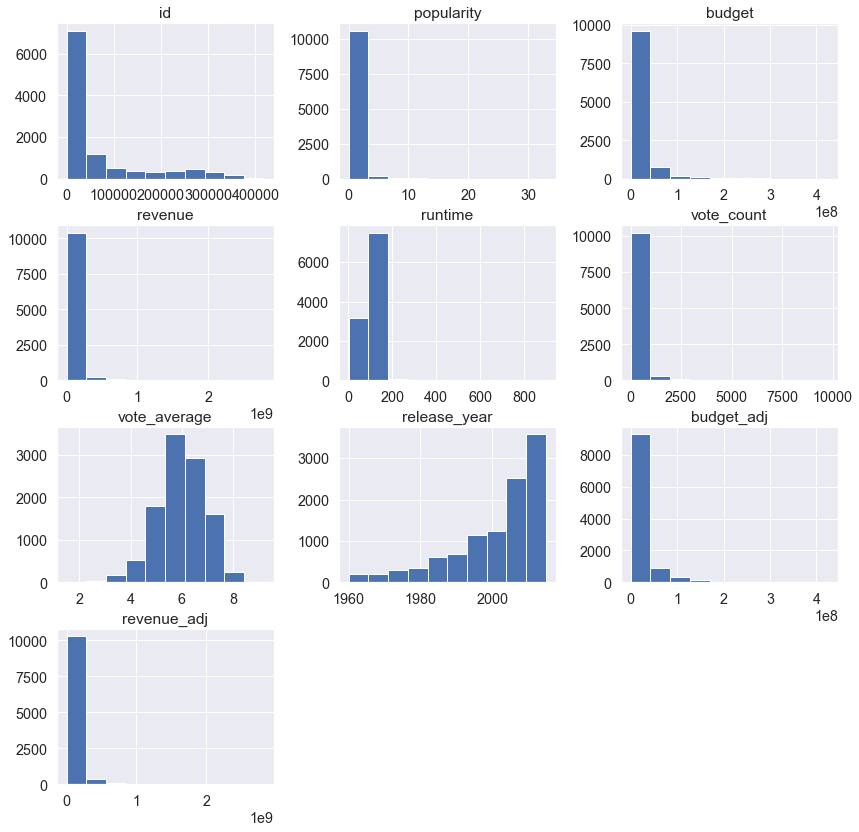

In [111]:
df.hist(figsize=(14,14));

### The relation between popularity and revenue_adj 

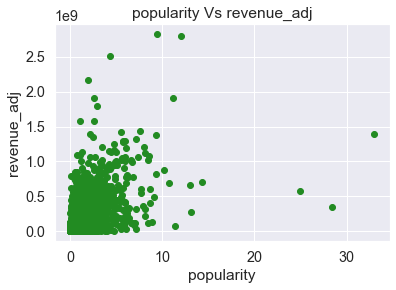

In [42]:
plt.scatter(df['popularity'],df['revenue_adj'],color='forestgreen');
plt.xlabel("popularity")
plt.ylabel("revenue_adj")
plt.title('popularity Vs revenue_adj')
plt.show()


### Conclution: 
* We have conclude that there is a positive relation between popularity and revenue_adj 

### Is there a relation between budget and revenue ?

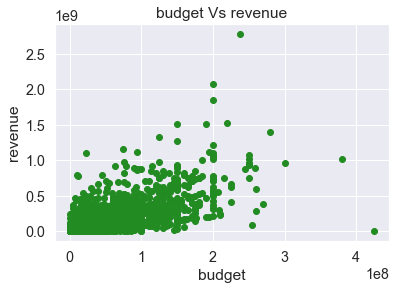

In [53]:
plt.scatter(df['budget'],df['revenue'],color='forestgreen');
plt.xlabel("budget")
plt.ylabel("revenue")
plt.title('budget Vs revenue')
plt.show()


### Conclution: 
* We have conclude that there is a positive relation between budget and revenue 

### What is the average budget  for the movies?

In [463]:
df['budget_adj'].mean()

36922388.75942374

In [464]:
df['budget_adj'].describe()

count    1.080000e+04
mean     3.692239e+07
std      2.901836e+07
min      9.210911e-01
25%      2.432644e+07
50%      3.692239e+07
75%      3.692239e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

### What is the average revenue  for the movies?

In [465]:
df['revenue_adj'].mean()

115122331.57113242

In [466]:
df['revenue_adj'].describe()

count    1.080000e+04
mean     1.151223e+08
std      1.332341e+08
min      2.370705e+00
25%      5.784371e+07
50%      1.151223e+08
75%      1.151223e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

### How many movies in each genre?

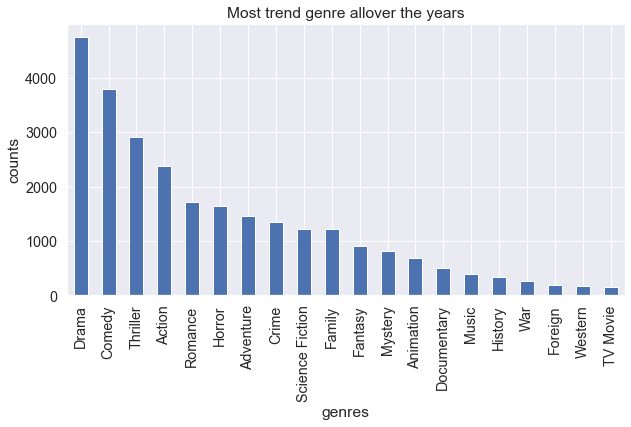

In [56]:
data = df['genres'].str.cat(sep = '|')

data= pd.Series(data.split('|')) 
    
data.value_counts(ascending=False).plot(kind='bar',figsize=(10,5));
plt.ylabel("counts")
plt.xlabel("genres")
plt.title('Most trend genre allover the years');

### What are the most ten profitable movie?

In [57]:
df['profit'] = df['revenue_adj'] - df['budget_adj']

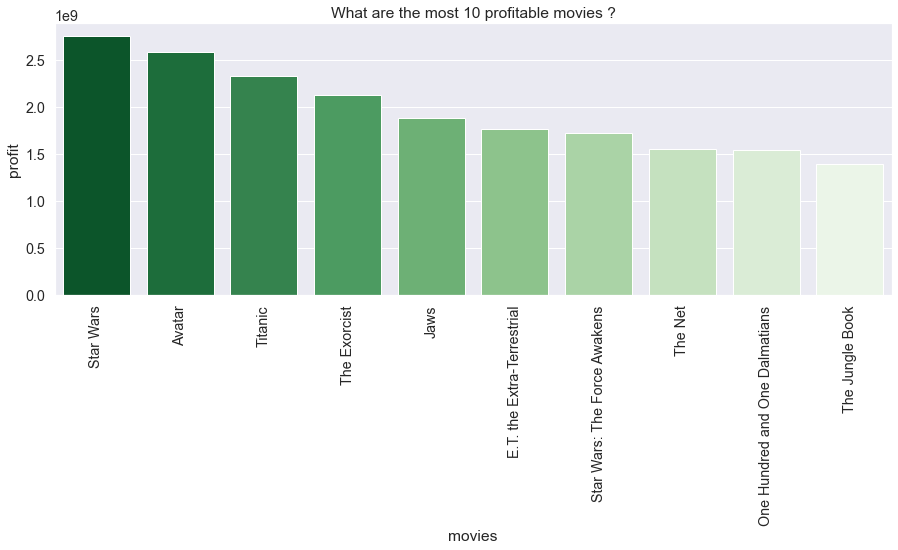

In [62]:
most_profitable= df.groupby('original_title').sum().profit.nlargest(10).reset_index()
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=most_profitable['original_title'], y=most_profitable['profit'],palette='Greens_r')
ax.tick_params(axis='x', rotation=90)
plt.xlabel('movies')
plt.ylabel('profit')
plt.title('What are the most 10 profitable movies ?'); 

### What are the most ten movies have highest reveneu ? 

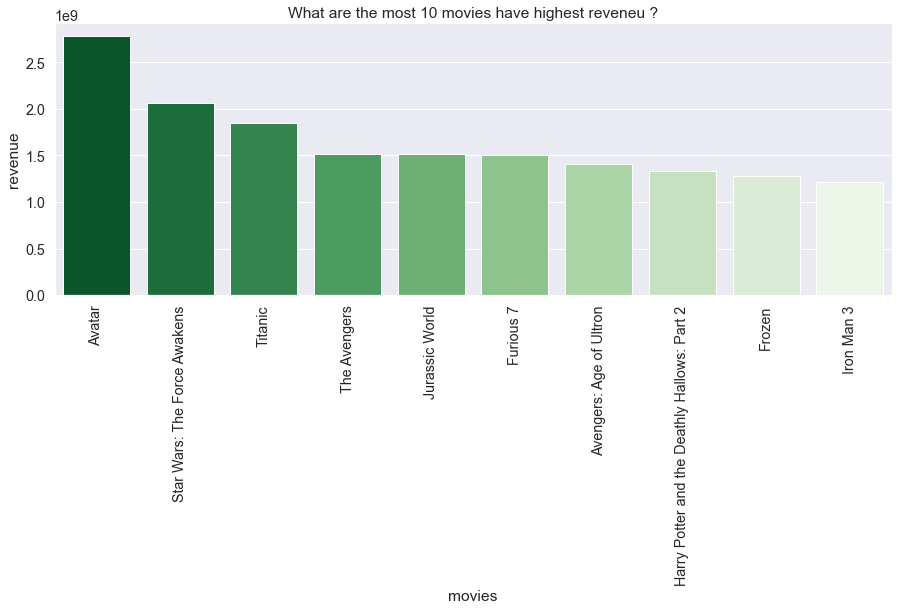

In [63]:
shared_properties= df.groupby(['original_title','genres']).sum().revenue.nlargest(10).reset_index()
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=shared_properties['original_title'], y=shared_properties['revenue'],palette='Greens_r')
ax.tick_params(axis='x', rotation=90)
plt.xlabel('movies')
plt.ylabel('revenue')
plt.title('What are the most 10 movies have highest reveneu ?');

### The most genres associated with the high revenue movies?

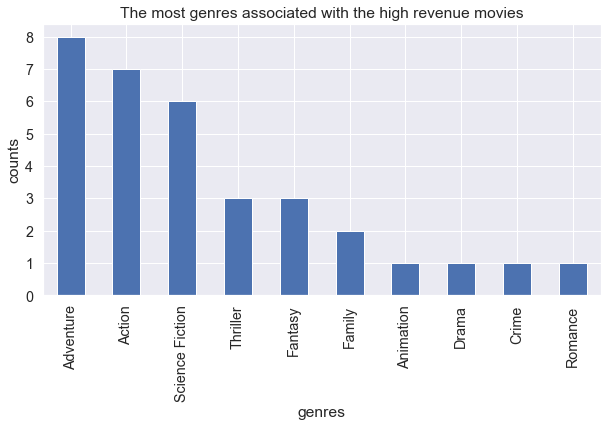

In [65]:
data = shared_properties['genres'].str.cat(sep = '|')

data= pd.Series(data.split('|')) 
    
data.value_counts(ascending=False).plot(kind='bar',figsize=(10,5))
plt.xlabel('genres')
plt.ylabel('counts')
plt.title('The most genres associated with the high revenue movies');

### Which movie have high popularity over all years ?

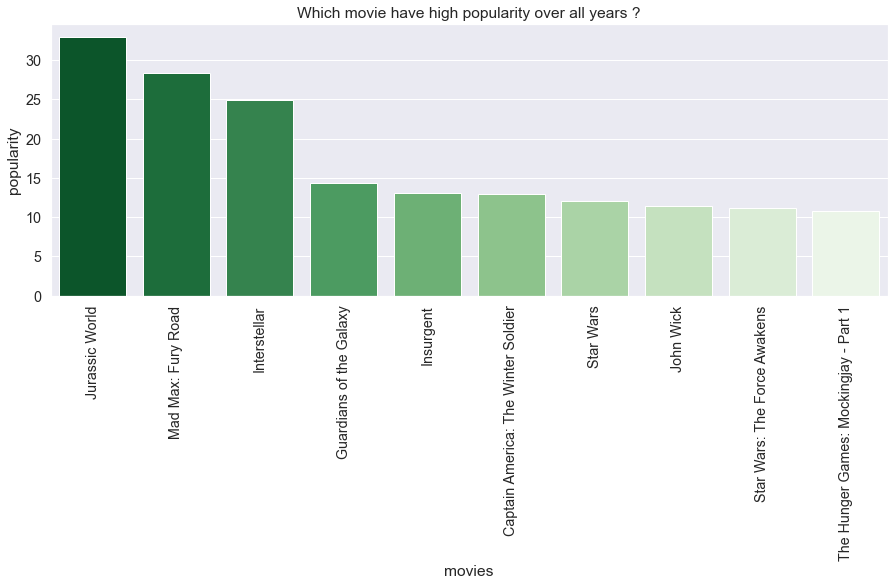

In [69]:
most_movie = df.groupby('original_title').sum().popularity.nlargest(10).reset_index()
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=most_movie['original_title'], y=most_movie['popularity'],palette='Greens_r')
ax.tick_params(axis='x', rotation=90)
plt.xlabel('movies')
plt.ylabel('popularity')
plt.title('Which movie have high popularity over all years ?');

### Which genre have high popularity over all years ?

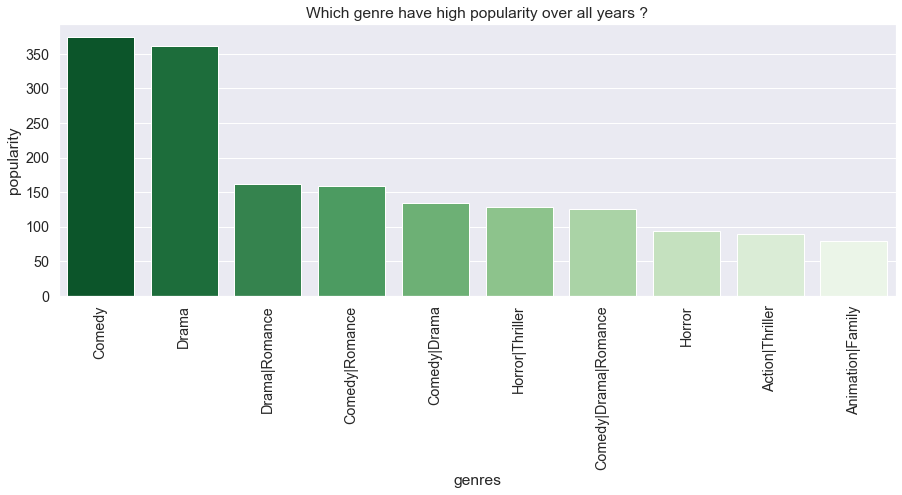

In [71]:
most_genre = df.groupby('genres').sum().popularity.nlargest(10).reset_index()
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=most_genre['genres'], y=most_genre['popularity'],palette='Greens_r')
ax.tick_params(axis='x', rotation=90)
plt.xlabel('genres')
plt.ylabel('popularity')
plt.title('Which genre have high popularity over all years ?');

### What are the most ten directors achieve highest reveneu from the movies ? 

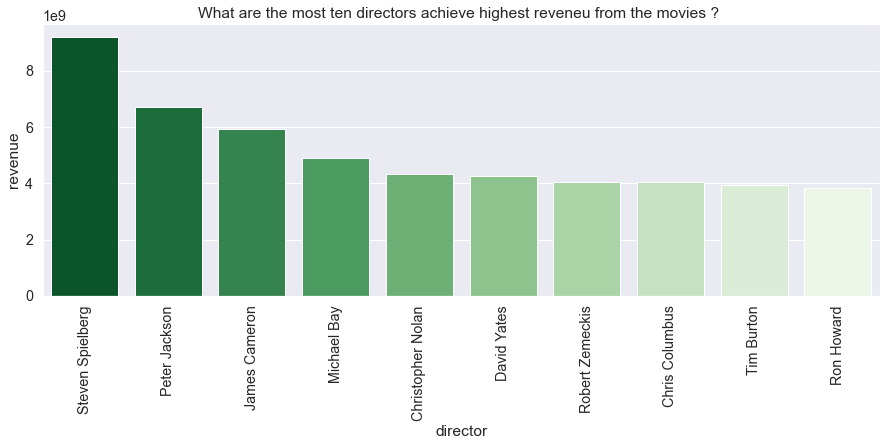

In [72]:
director_df = df.groupby('director').sum().revenue.nlargest(10).reset_index()
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=director_df['director'], y=director_df['revenue'],palette='Greens_r')
ax.tick_params(axis='x', rotation=90)
plt.xlabel('director')
plt.ylabel('revenue')
plt.title('What are the most ten directors achieve highest reveneu from the movies ? ');

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
<a id='conclusions'></a>
## Conclusions


* We have positive relationship between popularity and revenue
* We have positive relationship between budget and revenue
* Drama is the most genre has number of movies over all years
* Star Wars is the most proftable movie over all years.
* Avatar movie has the highest revenue over all years
* Movies that have high revenues associated with adventure genres the most in all years 
* Jurastic world movie has the highest popularity over all years
* Comedy genre has the highest popularity over all years
* Steven Spielberg is the director that achieved the highest revenue from its created movies

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Limitations

* The columns 'budget' and 'revenue' did not display the actual currency for the values.

* I decided to keep all the zero values from the data set because there were too many. That number was too much to drop from the dataset.They were replaced with mean values.

* The dataset does not confirm that every release of every director is listed.

* I decided to remove nan-values from the data that found in each director and genres columns as it is very few to ignor them
